# Practica 1: Patrones

###Janet Illescas Coria

In [52]:
# Obtener datos del csv
import pandas as pd
datos = pd.read_csv("datos.csv")
datos

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,NaN
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,NaN
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


- Minimo, maximo, media y desviacion estandar tanto para el numero de horas dedicadas como para las calificaciones obtenidas.

In [53]:
# Crear un DataFrame
df = pd.DataFrame(datos)

# Susituir los valores nulos
df = df.fillna(0)
df

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,0.0
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,0.0
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


In [54]:
# Obtener minimo, maximo, media y desviacion estandar del numero de horas
# dedicadas
hd = df["horas_dedicadas"]

print("HORAS DEDICADAS")
print("Minimo: ", hd.min())
print("Maximo: ", hd.max())
print("Media: ", hd.mean())
print("Desviacion estandar: ", hd.std())

HORAS DEDICADAS
Minimo:  2
Maximo:  178
Media:  99.4
Desviacion estandar:  58.129075974801204


In [55]:
# Obtener minimo, maximo, media y desviacion estandar de las calificaciones
# obtenidas
co = df["calificaciones_obtenida"]

print("CALIFICACIONES OBTENIDA")
print("Minimo: ", co.min())
print("Maximo: ", co.max())
print("Media: ", co.mean())
print("Desviacion estandar: ", co.std())

CALIFICACIONES OBTENIDA
Minimo:  0.0
Maximo:  100.0
Media:  57.65
Desviacion estandar:  37.35219996339256


- Analisis de regresion lineal y grafico que muestra el modelo de regresion junto con los datos originales.

In [56]:
# Obtener un arreglo del numero de horas dedicadas y otro de las calificaciones
# obtenidas
import numpy as np
array_hd = np.array(hd)
print(array_hd)
array_co = np.array(co)
print(array_co)

[ 52   2 170  42 125  47 149 162 139  18  30 152  51 164  93 162  55 178
  97 100]
[ 45.   0. 100.   0.  70.  40. 100.  80.  45.  30.   0. 100.   0.  98.
  60. 100.  40.  70.  80.  95.]


In [57]:
# Aplicar reshape() al arreglo del numero de horas dedicadas para transponerlo
array_hd = array_hd.reshape(-1,1)
array_hd

array([[ 52],
       [  2],
       [170],
       [ 42],
       [125],
       [ 47],
       [149],
       [162],
       [139],
       [ 18],
       [ 30],
       [152],
       [ 51],
       [164],
       [ 93],
       [162],
       [ 55],
       [178],
       [ 97],
       [100]])

In [70]:
# Crear modelo de regresion lineal
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

# Entrenar el modelo con los datos
modelo.fit(array_hd,array_co) #Fit entrena

# Predecir la calificacion obtenida
predic = modelo.predict(array_hd)

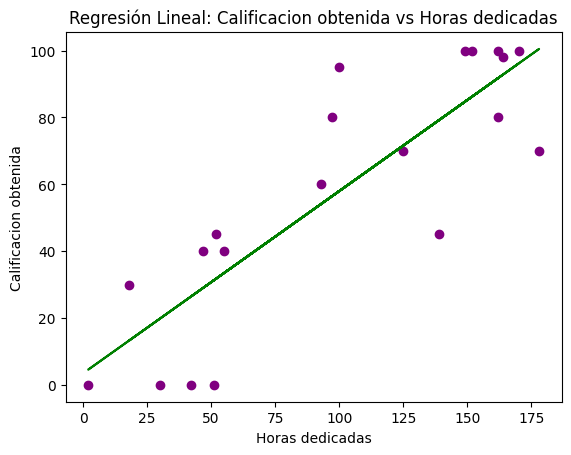

In [71]:
# Graficar los datos y la línea de regresión
import matplotlib.pyplot as plt
plt.scatter(array_hd, array_co, color = 'purple')
plt.plot(array_hd, modelo.predict(array_hd), color='green')
plt.title('Regresión Lineal: Calificacion obtenida vs Horas dedicadas')
plt.xlabel('Horas dedicadas')
plt.ylabel('Calificacion obtenida')
plt.show()

- Con el modelo de regresion realizar una prediccion de la calificacion
de un estudiante que hubiera dedicado n horas en el semestre a la materia
(donde n es la suma de los dıgitos de su numero de cuenta modulo 50).

In [72]:
# Calcular n
no_cuenta = "318219309"
digitos = [int(digit) for digit in no_cuenta]
n = sum(digitos) % 50
print("Numero de horas: ", n)

# Predecir la calificacion obtenida con n horas dedicadas
predic_n = modelo.predict([[n]])
print("Posible calificacion: ", predic_n[0])

Numero de horas:  36
Posible calificacion:  23.097628066939976


- Metodos para evaluar la bondad de ajuste del modelo y determinar cuan efectivamente explica el comportamiento de los datos.

In [73]:
# Metodo de coeficiente de determinacion: indica la proporción de la
# variabilidad en los datos (valores crecanos a 1 indican un mejor ajuste del
# modelo a los datos)
coef_det = modelo.score(array_hd,array_co)
print("Coeficiente de determinacion: ", coef_det)


Coeficiente de determinacion:  0.7193358137770824


(Aproximadamente el 71.93% de la variabilidad está siendo explicada por el modelo)

In [77]:
# Metodo de error cuadratico medio (mse): calcula el promedio de los cuadrados
# de las diferencias entre los valores predichos y los valores observados
# (valores más bajos indican un mejor ajuste del modelo a los datos)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(array_co, predic)
print("Error cuadrático medio: ", mse)


Error cuadrático medio:  372.0000306849759


In [78]:
# Metodo de absoluto medio (mae): calcula el promedio de las diferencias
# absolutas entre los valores predichos y los valores observados
# (valores más bajos indican un mejor ajuste del modelo a los datos)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(array_co, predic)
print("Error absoluto medio: ", mae)

Error absoluto medio:  16.012165580491214
